# Final Project Code
------

## Overview Analysis

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
csv_path = 'Clean_data/car_data.csv'
car_data_df = pd.read_csv(csv_path)
car_data_df

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30493,2018,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,NaN,Car,3920.0,Yes,Yes,Yes
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [3]:
car_data_df.columns.unique()

Index(['Year', 'Car Make and Model', 'Retail Price', 'Highway MPG',
       'Body Style', 'Base Curb Weight (lbs)', 'Parking Aid', 'Back-Up Camera',
       'Stability Control'],
      dtype='object')

In [4]:
grouped_car_data_df = round(car_data_df.groupby(['Year']).mean(),2)
grouped_car_data_df

,Retail Price,Highway MPG,Base Curb Weight (lbs)
Year,,,
1996,26343.32,23.53,3351.47
1997,26308.59,25.33,1342808.46
1998,26127.61,25.33,3201.90
1999,26161.23,25.33,3231.76
2000,26938.17,25.21,3279.29
2001,27510.10,25.00,3319.43
2002,29873.02,25.27,3393.57
2003,30792.76,24.94,3466.24
2004,31284.74,24.63,3529.26


In [5]:
grouped_car_data_df.reset_index(inplace=True)

In [6]:
#Set the columns
price_df = grouped_car_data_df["Retail Price"]
mpg_df = grouped_car_data_df["Highway MPG"]
year_df = grouped_car_data_df["Year"]

In [7]:
weight_df = grouped_car_data_df["Base Curb Weight (lbs)"]
weight_df

0        3351.47
1     1342808.46
2        3201.90
3        3231.76
4        3279.29
5        3319.43
6        3393.57
7        3466.24
8        3529.26
9        3499.54
10       3600.59
11       3633.56
12       3650.02
13       3652.44
14       3673.22
15     368398.66
16       3685.62
17       3635.69
18       3670.35
19       3656.70
20       3679.89
21       3698.80
22       3732.08
Name: Base Curb Weight (lbs), dtype: float64

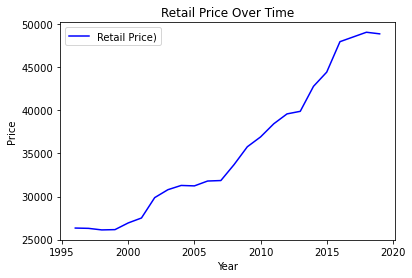

In [8]:
price = plt.plot(year_df, price_df, color="blue", label="Retail Price)")
plt.legend()
plt.title('Retail Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.savefig("output_images/Retail Price Over Time line chart.png", dpi=500)
plt.show()

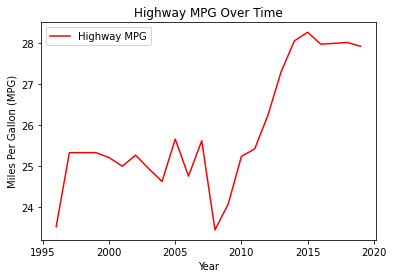

In [9]:
mpg = plt.plot(year_df, mpg_df, color="red", label="Highway MPG")
plt.legend()
plt.title('Highway MPG Over Time')
plt.xlabel('Year')
plt.ylabel('Miles Per Gallon (MPG)')
plt.savefig("output_images/Highway MPG Over Time line chart.png", dpi=500)
plt.show()

In [10]:
drop_weight = weight_df.drop([1,15])
drop_weight

0     3351.47
2     3201.90
3     3231.76
4     3279.29
5     3319.43
6     3393.57
7     3466.24
8     3529.26
9     3499.54
10    3600.59
11    3633.56
12    3650.02
13    3652.44
14    3673.22
16    3685.62
17    3635.69
18    3670.35
19    3656.70
20    3679.89
21    3698.80
22    3732.08
Name: Base Curb Weight (lbs), dtype: float64

In [11]:
drop_year = year_df.drop([1,15])
drop_year

0     1996
2     1998
3     1999
4     2000
5     2001
6     2002
7     2003
8     2004
9     2005
10    2006
11    2007
12    2008
13    2009
14    2010
16    2012
17    2013
18    2014
19    2015
20    2016
21    2018
22    2019
Name: Year, dtype: int64

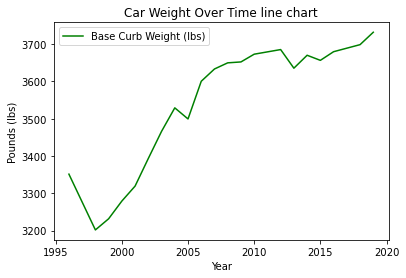

In [12]:
weight = plt.plot(drop_year, drop_weight, color="green", label="Base Curb Weight (lbs)")
plt.legend()
plt.title('Car Weight Over Time line chart')
plt.xlabel('Year')
plt.ylabel('Pounds (lbs)')
plt.savefig("output_images/Car Weight Over Time line chart.png", dpi=500)
plt.show()

## MPG Analysis

In [13]:
mpg_year_group = car_data_df.groupby(['Body Style','Year']).mean()['Highway MPG']

In [14]:
mpg_year_group_df = pd.DataFrame(mpg_year_group).reset_index()
mpg_year_group_df

,Body Style,Year,Highway MPG
0,Car,1996,24.144444
1,Car,1997,26.321429
2,Car,1998,26.459239
3,Car,1999,26.461538
4,Car,2000,26.596659
...,...,...,...
64,Van,2014,23.192308
65,Van,2015,24.209677
66,Van,2016,24.033333
67,Van,2018,26.491803


In [15]:
body_styles = mpg_year_group_df['Body Style'].unique()
mpg_year_group_df

,Body Style,Year,Highway MPG
0,Car,1996,24.144444
1,Car,1997,26.321429
2,Car,1998,26.459239
3,Car,1999,26.461538
4,Car,2000,26.596659
...,...,...,...
64,Van,2014,23.192308
65,Van,2015,24.209677
66,Van,2016,24.033333
67,Van,2018,26.491803


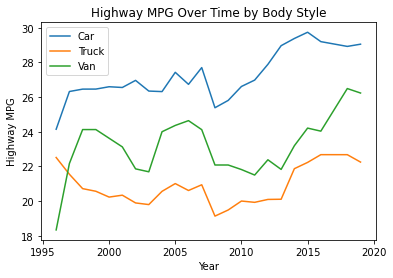

In [16]:
for style in body_styles:
    filter_df = mpg_year_group_df.loc[mpg_year_group_df["Body Style"] == style]
    plt.plot(filter_df['Year'],filter_df['Highway MPG'], label = style)
plt.legend()
plt.title('Highway MPG Over Time by Body Style')
plt.xlabel('Year')
plt.ylabel('Highway MPG')
plt.savefig("output_images/MpgOverTime.png",dpi=200)
plt.show()

In [17]:
mpg_year_group = car_data_df.groupby(['Body Style','Year']).mean()[['Retail Price','Highway MPG']].reset_index()
mpg_year_group

,Body Style,Year,Retail Price,Highway MPG
0,Car,1996,27925.186544,24.144444
1,Car,1997,28097.921833,26.321429
2,Car,1998,27755.932615,26.459239
3,Car,1999,27577.415233,26.461538
4,Car,2000,28482.681395,26.596659
...,...,...,...,...
64,Van,2014,32097.559524,23.192308
65,Van,2015,33122.941176,24.209677
66,Van,2016,33639.392523,24.033333
67,Van,2018,35936.954023,26.491803


The correlation of Car price to highway mpg is 0.78
The correlation of Truck price to highway mpg is 0.32
The correlation of Van price to highway mpg is 0.39


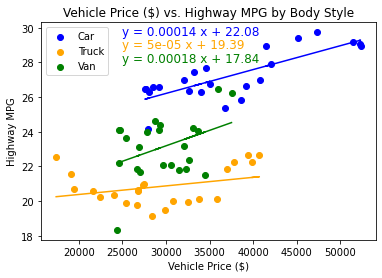

In [18]:
colors = ['blue', 'orange', 'green']
location1 = 29.6
location2 = 25000

for x in range(len(colors)):
    filter_df = mpg_year_group.loc[mpg_year_group["Body Style"] == body_styles[x]]
    plt.scatter(filter_df['Retail Price'],filter_df['Highway MPG'],color = colors[x], label = body_styles[x])
    (slope, intercept, rvalue, pvalue, stderr) = linregress(filter_df['Retail Price'],filter_df['Highway MPG'])
    regress_values = slope * filter_df['Retail Price'] + intercept
    line_equation = f"y = {str(round(slope, 5))} x + {str(round(intercept,2))}"
    plt.plot(filter_df['Retail Price'],regress_values, color = colors[x])
    plt.annotate(line_equation,(location2,location1), fontsize = 12, color = colors[x])
    location1 = location1 - .8
    print (f'The correlation of {body_styles[x]} price to highway mpg is {str(round(rvalue,2))}')
plt.title('Vehicle Price ($) vs. Highway MPG by Body Style')
plt.xlabel('Vehicle Price ($)')
plt.ylabel('Highway MPG')
plt.legend()
plt.savefig("output_images/PriceVsMpg.png",dpi=200)
plt.show()

## Weight Analysis

In [19]:
car_data_df.columns.unique()

Index(['Year', 'Car Make and Model', 'Retail Price', 'Highway MPG',
       'Body Style', 'Base Curb Weight (lbs)', 'Parking Aid', 'Back-Up Camera',
       'Stability Control'],
      dtype='object')

In [20]:
car_data_df['Base Curb Weight (lbs)'].isnull().sum()

11042

In [21]:
car_data_df['Highway MPG'].isnull().sum()

4214

In [22]:
dropped_df=car_data_df.dropna(subset=['Base Curb Weight (lbs)', 'Highway MPG'])
dropped_df

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30491,1998,1998 Volvo S90 Specs: 4-Door Sedan,34300.0,25.0,Car,3461.0,No,No,No
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [23]:
#sort by year
dropped_df.sort_values('Year').reset_index(drop=True)

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,1996,1996 Buick Regal Specs: 4-Door Sedan Gold,20605.0,30.0,Car,3355.0,No,No,No
1,1996,1996 Jeep Grand Cherokee Specs: 4-Door Limited...,33056.0,20.0,Car,3675.0,No,No,No
2,1996,1996 Jeep Grand Cherokee Specs: 4-Door Laredo,24903.0,21.0,Car,3675.0,No,No,No
3,1996,1996 Jeep Grand Cherokee Specs: 4-Door Limited,30629.0,21.0,Car,3675.0,No,No,No
4,1996,1996 Jeep Grand Cherokee Specs: 4-Door Laredo 4WD,26871.0,20.0,Car,3675.0,No,No,No
...,...,...,...,...,...,...,...,...,...
18592,2019,2019 Mercedes-Benz C Class Specs: AMG C 63 S C...,76450.0,26.0,Car,4134.0,No,Yes,Yes
18593,2019,2019 Mercedes-Benz C Class Specs: C 300 Coupe,43800.0,31.0,Car,3527.0,No,Yes,Yes
18594,2019,2019 Mercedes-Benz C Class Specs: AMG C 63 Sedan,67000.0,27.0,Car,3874.0,No,Yes,Yes
18595,2019,2019 Toyota Highlander Specs: Limited Platinum...,47210.0,26.0,Car,4508.0,Yes,Yes,Yes


In [24]:
dropped_df.groupby(['Body Style','Year']).agg('mean')['Base Curb Weight (lbs)']

Body Style  Year
Car         1996    3.351473e+03
            1997    1.375784e+06
            1998    3.185855e+03
            1999    3.215669e+03
            2000    3.263649e+03
            2001    3.315674e+03
            2002    3.368327e+03
            2003    3.438408e+03
            2004    3.504843e+03
            2005    3.474533e+03
            2006    3.572300e+03
            2007    3.558183e+03
            2008    3.617662e+03
            2009    3.638787e+03
            2010    3.643919e+03
            2011    3.861695e+05
            2012    3.696546e+03
            2013    3.613452e+03
            2014    3.641348e+03
            2015    3.639841e+03
            2016    3.680484e+03
            2018    3.674490e+03
            2019    3.684726e+03
Truck       2006    4.498200e+03
            2007    4.518600e+03
            2008    4.518600e+03
            2009    4.531250e+03
            2010    4.531250e+03
            2011    4.531250e+03
            2012    4.5258

In [25]:
#from 2 years of cars I see that there are 2 values bigger than others 

totest = dropped_df[(dropped_df['Year']==1997) & (dropped_df['Body Style']=='Car')  ]
big_values_df=totest [totest['Base Curb Weight (lbs)'] > 10000]
big_values_df
# plt.plot(totest['Base Curb Weight (lbs)'])

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
25533,1997,1997 Subaru Legacy Specs: 5-Door Wagon Postal ...,17195.0,30.0,Car,29053250.0,No,No,No
25537,1997,1997 Subaru Legacy Specs: 5-Door Wagon GT Manu...,23495.0,27.0,Car,29053250.0,No,No,No
25538,1997,1997 Subaru Legacy Specs: 5-Door Wagon XA Brig...,16895.0,30.0,Car,29053250.0,No,No,No
25539,1997,1997 Subaru Legacy Specs: 5-Door Wagon L Manua...,19895.0,30.0,Car,29053250.0,No,No,No
25543,1997,1997 Subaru Legacy Specs: 5-Door Wagon L Autom...,20695.0,30.0,Car,29053250.0,No,No,No
25544,1997,1997 Subaru Legacy Specs: 5-Door Wagon LSi Aut...,25695.0,27.0,Car,29053250.0,No,No,No
25545,1997,1997 Subaru Legacy Specs: 5-Door Wagon GT Auto...,24295.0,27.0,Car,29053250.0,No,No,No
25546,1997,1997 Subaru Legacy Specs: 5-Door Wagon XA Brig...,17695.0,30.0,Car,29053250.0,No,No,No
25843,1997,1997 Subaru Impreza Specs: 4-Door Sedan L Auto...,16695.0,30.0,Car,26902770.0,No,No,No
25844,1997,1997 Subaru Impreza Specs: Coupe L 2.2L Manual...,15895.0,30.0,Car,26002795.0,No,No,No


In [26]:
totest = dropped_df[(dropped_df['Year']==2011) & (dropped_df['Body Style']=='Car')  ]
big_values_2=totest [totest['Base Curb Weight (lbs)'] > 10000]
big_values_2

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
15607,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.0L A...,27245.0,33.0,Car,33383452.0,No,No,Yes
15609,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.4L A...,22795.0,35.0,Car,31993316.0,No,No,Yes
15610,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.4L A...,25495.0,35.0,Car,31993316.0,No,No,Yes
15611,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.4L A...,25495.0,35.0,Car,31993316.0,No,No,Yes
15612,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.4L A...,25495.0,35.0,Car,31993316.0,No,No,Yes
15613,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.4L A...,25495.0,35.0,Car,31993316.0,No,No,Yes
15614,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.4L A...,25795.0,39.0,Car,34573578.0,No,No,Yes
15615,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.4L A...,20395.0,35.0,Car,31993316.0,No,No,Yes
15616,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.4L A...,20395.0,35.0,Car,31993316.0,No,No,Yes
15617,2011,2011 Hyundai Sonata Specs: 4-Door Sedan 2.0L A...,24345.0,33.0,Car,33383452.0,No,No,Yes


In [27]:
first_df=pd.concat([dropped_df, big_values_df, big_values_df]).drop_duplicates(keep=False)
first_df

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30491,1998,1998 Volvo S90 Specs: 4-Door Sedan,34300.0,25.0,Car,3461.0,No,No,No
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [28]:
second_df=pd.concat([first_df,big_values_2, big_values_2]).drop_duplicates(keep=False)
second_df

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30491,1998,1998 Volvo S90 Specs: 4-Door Sedan,34300.0,25.0,Car,3461.0,No,No,No
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [29]:
data_to_plot=round(second_df.groupby(['Body Style','Year']).agg('mean')['Base Curb Weight (lbs)'],2)
data_to_plot

Body Style  Year
Car         1996    3351.47
            1997    3175.51
            1998    3185.85
            1999    3215.67
            2000    3263.65
            2001    3315.67
            2002    3368.33
            2003    3438.41
            2004    3504.84
            2005    3474.53
            2006    3572.30
            2007    3558.18
            2008    3617.66
            2009    3638.79
            2010    3643.92
            2011    3714.87
            2012    3696.55
            2013    3613.45
            2014    3641.35
            2015    3639.84
            2016    3680.48
            2018    3674.49
            2019    3684.73
Truck       2006    4498.20
            2007    4518.60
            2008    4518.60
            2009    4531.25
            2010    4531.25
            2011    4531.25
            2012    4525.80
Van         1997    3468.33
            1998    3680.57
            1999    4029.71
            2000    4032.57
            2001    4106.00
   

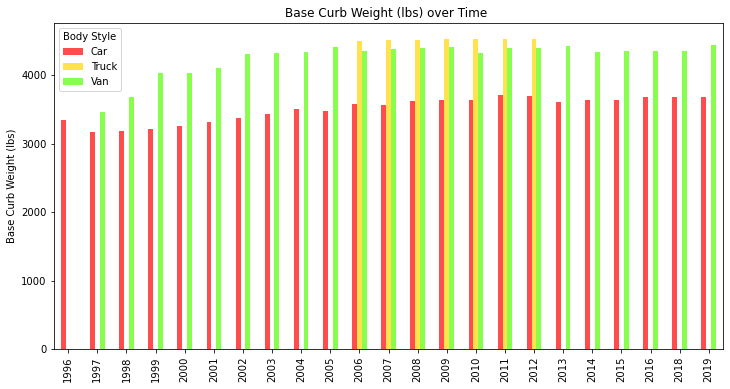

In [30]:
#make a bar chart
data_to_plot.unstack(level=0).plot(kind='bar', figsize=(12, 6), legend = 'best', colormap='prism', alpha=0.7)
plt.xlabel(None)
plt.ylabel('Base Curb Weight (lbs)')
plt.title('Base Curb Weight (lbs) over Time ')
plt.savefig("output_images/Base Curb weight over Time bar chart.png", dpi=500)

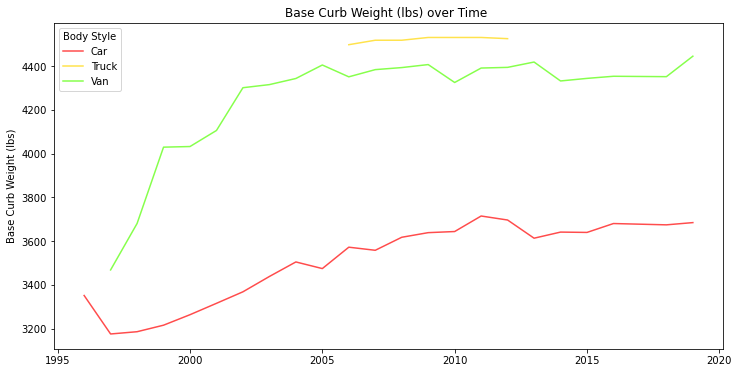

In [31]:
#make a bar chart
data_to_plot.unstack(level=0).plot(kind='line', figsize=(12, 6), legend = 'best', colormap='prism', alpha=0.7)
plt.xlabel(None)
plt.ylabel('Base Curb Weight (lbs)')
plt.title('Base Curb Weight (lbs) over Time ')
plt.savefig("output_images/Base Curb weight over Time line chart.png", dpi=500)

In [32]:
van_df = second_df[second_df['Body Style']=='Van'].sort_values('Year').reset_index(drop=True)
van_df

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,1997,1997 Honda Odyssey Specs: 5-Door 6-Passenger EX,25550.0,26.0,Van,3483.0,No,No,No
1,1997,1997 Honda Odyssey Specs: 5-Door 7-Passenger LX,23560.0,26.0,Van,3472.0,No,No,No
2,1997,1997 Honda Odyssey Specs: 5-Door 6-Passenger LX,23970.0,26.0,Van,3450.0,No,No,No
3,1998,1998 Toyota Sienna Specs: 4-Door LE,23630.0,24.0,Van,3826.0,No,No,No
4,1998,1998 Toyota Sienna Specs: 5-Door XLE,27230.0,24.0,Van,3892.0,No,No,No
...,...,...,...,...,...,...,...,...,...
471,2019,2019 Honda Odyssey Specs: EX-L Automatic,37710.0,28.0,Van,4471.0,No,Yes,Yes
472,2019,2019 Honda Odyssey Specs: LX Automatic,30190.0,28.0,Van,4354.0,No,Yes,Yes
473,2019,2019 Honda Odyssey Specs: Touring Automatic,44760.0,28.0,Van,4564.0,Yes,Yes,Yes
474,2019,2019 Toyota Sienna Specs: SE Premium FWD 8-Pas...,43560.0,27.0,Van,4605.0,Yes,Yes,Yes


The correlation between Highway MPG and Curb weight is -0.24


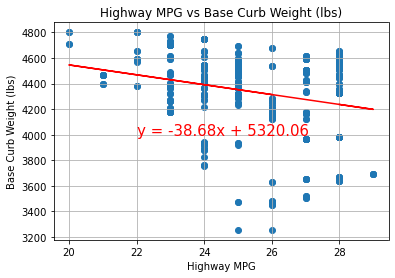

In [33]:
# Base Curb Weight 
# See correlation by 1 body style related to Gas mileage- scatter plot 
# Calculate the correlation coefficient and linear regression model_
x_values = van_df['Highway MPG']
y_values = van_df['Base Curb Weight (lbs)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,4000),fontsize=15,color="red")
plt.xlabel('Highway MPG')
plt.ylabel('Base Curb Weight (lbs)')
plt.title('Highway MPG vs Base Curb Weight (lbs)')
plt.grid()

# Get correlation efficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Highway MPG and Curb weight is {round(correlation[0],2)}")
plt.show()

In [34]:
rvalue

-0.24400153681190404

In [35]:
pvalue

6.999425290094139e-08

In [36]:
# Base Curb Weight 
# See correlation by ALL body style related to Gas mileage- scatter plot 
# Calculate the correlation coefficient and linear regression model_

def plotlinear(all_cat_df, style):
    fig, axis = plt.subplots()
    x_values = all_cat_df['Highway MPG']
    y_values = all_cat_df['Base Curb Weight (lbs)']
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    axis.scatter(x_values,y_values)
    axis.plot(x_values,regress_values,"r-")
    axis.annotate(line_eq,(20,4550),fontsize=15,color="red")
    
    axis.set_xlabel('Highway MPG')
    axis.set_ylabel('Base Curb Weight (lbs)')
    axis.set_title(f'Highway MPG vs Base Curb Weight(lbs): {style}')
    #plt.title('Highway MPG vs Base Curb Weight (lbs)')
    axis.grid()

    # Get correlation efficient
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between Highway MPG and Curb weight is {round(correlation[0],2)}")
#     fig.show()
    fig.savefig(f'output_images/Highway MPG and Curb weight {style}.png', dpi=500)

Car
The correlation between Highway MPG and Curb weight is -0.67
Van
The correlation between Highway MPG and Curb weight is -0.24
Truck
The correlation between Highway MPG and Curb weight is -0.25


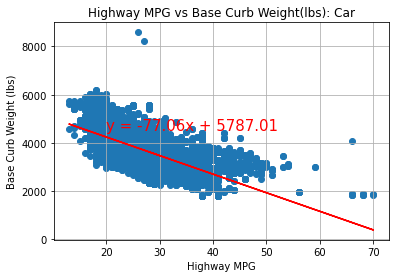

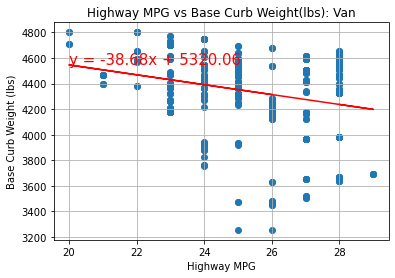

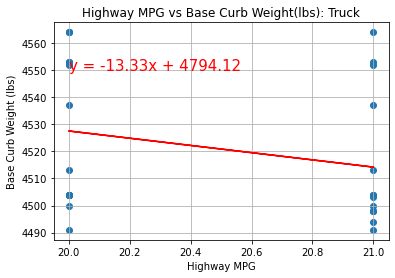

In [37]:
styles = ['Car', 'Van', 'Truck']
for style in styles:
    print(style)
    all_cat_df = second_df[second_df['Body Style']== style].sort_values('Year').reset_index(drop=True)
    plotlinear(all_cat_df, style)

## Retail Price Analysis

In [38]:
# Group by body style and year & grab Retail Price

grouped_df = car_data_df.groupby(["Body Style", "Year"]).mean()["Retail Price"]
grouped_df = pd.DataFrame(grouped_df).reset_index()

grouped_df

,Body Style,Year,Retail Price
0,Car,1996,27925.186544
1,Car,1997,28097.921833
2,Car,1998,27755.932615
3,Car,1999,27577.415233
4,Car,2000,28482.681395
...,...,...,...
64,Van,2014,32097.559524
65,Van,2015,33122.941176
66,Van,2016,33639.392523
67,Van,2018,35936.954023


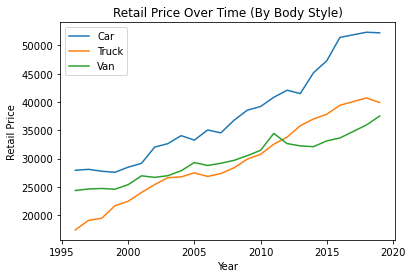

In [39]:
# Line plot for data (use a loop for each body style)

body_styles = grouped_df["Body Style"].unique()

for x in body_styles:
    styles_df = grouped_df[grouped_df["Body Style"] == x]
    plt.plot(styles_df["Year"], styles_df["Retail Price"], label = x)

plt.xlabel("Year")
plt.ylabel("Retail Price")
plt.title("Retail Price Over Time (By Body Style)")
plt.legend()
plt.savefig("output_images/Retail Price Over Time.png",dpi=200)
plt.show()

In [40]:
##  Part Two : Correlation between price & weight (Scatterplot)
# Need to drop outliers in base weight column

outlier_df = car_data_df[(car_data_df['Year'] == 1997) & (car_data_df['Body Style']=='Car')]
outlier_values_df = outlier_df[outlier_df['Base Curb Weight (lbs)'] > 10000]

dropped_df1 = pd.concat([car_data_df, outlier_values_df, outlier_values_df]).drop_duplicates(keep=False)


outlier_df2 = car_data_df[(car_data_df["Year"] == 2011) & (car_data_df["Body Style"] == "Car")]
outlier_values_df2 = outlier_df2[outlier_df2["Base Curb Weight (lbs)"] > 10000]

dropped_df2 = pd.concat([dropped_df1, outlier_values_df2, outlier_values_df2]).drop_duplicates(keep=False)

dropped_df2


,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30493,2018,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,NaN,Car,3920.0,Yes,Yes,Yes
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [41]:
# Create a new DataFrame that grabs weight column & retail price

scatter_df = dropped_df2.groupby(["Body Style", "Year"]).mean()[["Retail Price", "Base Curb Weight (lbs)"]].reset_index()

scatter_df

,Body Style,Year,Retail Price,Base Curb Weight (lbs)
0,Car,1996,27925.186544,3351.472727
1,Car,1997,28538.898592,3173.063694
2,Car,1998,27755.932615,3191.718571
3,Car,1999,27577.415233,3216.417582
4,Car,2000,28482.681395,3265.072776
...,...,...,...,...
64,Van,2014,32097.559524,4332.411765
65,Van,2015,33122.941176,4344.146341
66,Van,2016,33639.392523,4353.833333
67,Van,2018,35936.954023,4391.708333


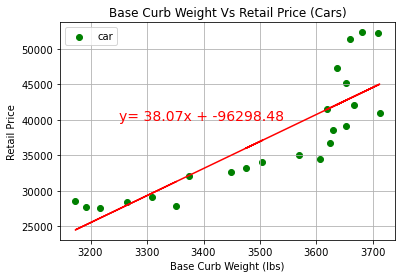

The correlation between Base Curb Weight and Retail Price of Cars is 0.84
The r-squared value is: 0.7139, 


In [42]:
#  Find Correlation coefficient and linear regression
# Create scatterplots between price & weight (Scatterplot)

car_df = scatter_df[(scatter_df["Body Style"] == "Car")]

car_weight = car_df.iloc[:, 3]
car_retail_price = car_df.iloc[:, 2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(car_weight, car_retail_price)
regress_values = car_weight * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(car_weight, car_retail_price, color="green", label="car")
plt.plot(car_weight, regress_values, "r-")
plt.xlabel("Base Curb Weight (lbs)")
plt.ylabel("Retail Price")
plt.title("Base Curb Weight Vs Retail Price (Cars)")
plt.annotate(line_eq, (3250, 40000), fontsize=14, color="red")
plt.grid()
plt.legend()
plt.savefig("output_images/Car Weight Vs Price.png",dpi=200)
plt.show()

# Correlation Coefficient - Use Pearson correlation coefficient

correlation = st.pearsonr(car_weight, car_retail_price)
print(f"The correlation between Base Curb Weight and Retail Price of Cars is {round(correlation[0],2)}")
print(f"The r-squared value is: {rvalue**2:.4f}, ")

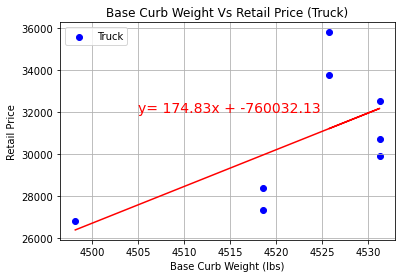

The correlation between Base Curb Weight and Retail Price of Trucks is 0.61
The r-squared value is: 0.3755, 


In [43]:
# Do the same for trucks - Need to drop Naan Values first

truck_df = scatter_df[(scatter_df["Body Style"] == "Truck")]
truck_df = truck_df.dropna(subset=["Base Curb Weight (lbs)"])

truck_weight = truck_df.iloc[:, 3]
truck_retail_price = truck_df.iloc[:, 2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(truck_weight, truck_retail_price)
regress_values = truck_weight * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(truck_weight, truck_retail_price, color="blue", label="Truck")
plt.plot(truck_weight, regress_values, "r-")
plt.xlabel("Base Curb Weight (lbs)")
plt.ylabel("Retail Price")
plt.title("Base Curb Weight Vs Retail Price (Truck)")
plt.annotate(line_eq, (4505, 32000), fontsize=14, color="red")
plt.grid()
plt.legend()
plt.savefig("output_images/Truck Weight Vs Price.png",dpi=200)
plt.show()

# Correlation Coefficient - Use Pearson correlation coefficient

correlation = st.pearsonr(truck_weight, truck_retail_price)
print(f"The correlation between Base Curb Weight and Retail Price of Trucks is {round(correlation[0],2)}")
print(f"The r-squared value is: {rvalue**2:.4f}, ")

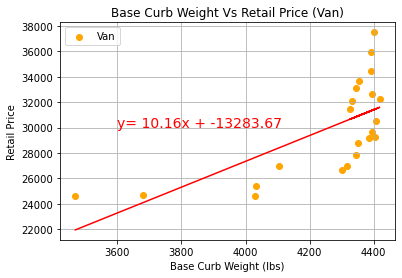

The correlation between Base Curb Weight and Retail Price of Vans is 0.67
The r-squared value is: 0.4543, 


In [44]:
# Same for Vans - Need to drop Naan Values first

van_df = scatter_df[(scatter_df["Body Style"] == "Van")]
van_df = van_df.dropna(subset=["Base Curb Weight (lbs)"])

van_weight = van_df.iloc[:, 3]
van_retail_price = van_df.iloc[:, 2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(van_weight, van_retail_price)
regress_values = van_weight * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(van_weight, van_retail_price, color="orange", label="Van")
plt.plot(van_weight, regress_values, "r-")
plt.xlabel("Base Curb Weight (lbs)")
plt.ylabel("Retail Price")
plt.title("Base Curb Weight Vs Retail Price (Van)")
plt.annotate(line_eq, (3600, 30000), fontsize=14, color="red")
plt.grid()
plt.legend()
plt.savefig("output_images/Van Weight Vs Price.png",dpi=200)
plt.show()

# Correlation Coefficient & r-square value - Use Pearson correlation coefficient

correlation = st.pearsonr(van_weight, van_retail_price)
print(f"The correlation between Base Curb Weight and Retail Price of Vans is {round(correlation[0],2)}")
print(f"The r-squared value is: {rvalue**2:.4f}, ")

## Technology Analysis

In [45]:
# Output File (CSV)
output_data_file = "Clean_data/car_data.csv"

#Read WeatherPy CSV file
car_data= pd.read_csv(output_data_file)

car_data

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
30493,2018,2018 Volvo V60 Cross Country Specs: T5 AWD Pla...,45700.0,NaN,Car,3920.0,Yes,Yes,Yes
30494,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,41200.0,28.0,Car,3602.0,Yes,No,Yes
30495,2016,2016 Volvo V60 Cross Country Specs: 4-Door Wag...,44850.0,28.0,Car,3602.0,Yes,Yes,Yes
30496,2015,2015 Volvo V60 Cross Country Specs: 2015.5 4-D...,41000.0,28.0,Car,3602.0,Yes,No,Yes


In [46]:
#Creating conditions to determine mean of technology across years
################################################################
#Create new column to state if a car has parking aid (1 = Yes)
Conditions=[
		(car_data['Parking Aid'] == "Yes"),
		(car_data['Parking Aid'] == "No")
	]

Values=[1,0]


car_data["Includes Parking Aid"]=np.select(Conditions,Values)

################################################################
#Create new column to state if a car has Back-Up Camera (1 = Yes)
Conditions=[
		(car_data['Back-Up Camera'] == "Yes"),
		(car_data['Back-Up Camera'] == "No")
	]

Values=[1,0]


car_data["Includes Back-Up Camera"]=np.select(Conditions,Values)

################################################################
#Create new column to state if a car has Stability Control (1 = Yes)
Conditions=[
		(car_data["Stability Control"] == "Yes"),
		(car_data["Stability Control"] == "No")
	]

Values=[1,0]


car_data["Includes Stability Control"]=np.select(Conditions,Values)

car_data.head()

,Year,Car Make and Model,Retail Price,Highway MPG,Body Style,Base Curb Weight (lbs),Parking Aid,Back-Up Camera,Stability Control,Includes Parking Aid,Includes Back-Up Camera,Includes Stability Control
0,2019,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,28.0,Car,3790.0,Yes,Yes,Yes,1,1,1
1,2019,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,28.0,Car,3829.0,Yes,Yes,Yes,1,1,1
2,2019,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,27.0,Car,3821.0,Yes,Yes,Yes,1,1,1
3,2019,2019 Acura RDX Specs: FWD,37400.0,28.0,Car,3783.0,No,Yes,Yes,0,1,1
4,2019,2019 Acura RDX Specs: AWD w/Technology Pkg,42600.0,27.0,Car,4026.0,Yes,Yes,Yes,1,1,1


In [47]:
technology_columns =["Year", "Includes Parking Aid", "Includes Back-Up Camera", "Includes Stability Control"]

Technology_df = car_data[technology_columns]

Technology_df.head()

,Year,Includes Parking Aid,Includes Back-Up Camera,Includes Stability Control
0,2019,1,1,1
1,2019,1,1,1
2,2019,1,1,1
3,2019,0,1,1
4,2019,1,1,1


In [48]:
# Group by Year of Model
grouped_tech_year = Technology_df.groupby(["Year"]).first()

# Find Yearly Technology % by finding the mean in the original dataframe (0 and 1 values)
grouped_tech_year["% Parking Aid"] = (Technology_df.groupby("Year")["Includes Parking Aid"].mean() * 100)

grouped_tech_year["% Back-Up Camera"] = (Technology_df.groupby("Year")["Includes Back-Up Camera"].mean() * 100)

grouped_tech_year["% Stability Control"] = (Technology_df.groupby("Year")["Includes Stability Control"].mean() * 100)

grouped_tech_year.head()


,Includes Parking Aid,Includes Back-Up Camera,Includes Stability Control,% Parking Aid,% Back-Up Camera,% Stability Control
Year,,,,,,
1996,0,0,0,0.000000,0.0,1.278772
1997,0,0,0,0.639659,0.0,0.852878
1998,0,0,0,0.212314,0.0,1.910828
1999,0,0,0,0.184162,0.0,3.683241
2000,0,0,0,0.341297,0.0,7.337884


In [49]:
Final_tech_columns =["% Parking Aid", "% Back-Up Camera", "% Stability Control"]

tech_df= grouped_tech_year[Final_tech_columns]
tech_df.head()

,% Parking Aid,% Back-Up Camera,% Stability Control
Year,,,
1996,0.000000,0.0,1.278772
1997,0.639659,0.0,0.852878
1998,0.212314,0.0,1.910828
1999,0.184162,0.0,3.683241
2000,0.341297,0.0,7.337884


In [50]:
final_tech_df =tech_df.reset_index()

final_tech_df.head()

,Year,% Parking Aid,% Back-Up Camera,% Stability Control
0,1996,0.000000,0.0,1.278772
1,1997,0.639659,0.0,0.852878
2,1998,0.212314,0.0,1.910828
3,1999,0.184162,0.0,3.683241
4,2000,0.341297,0.0,7.337884


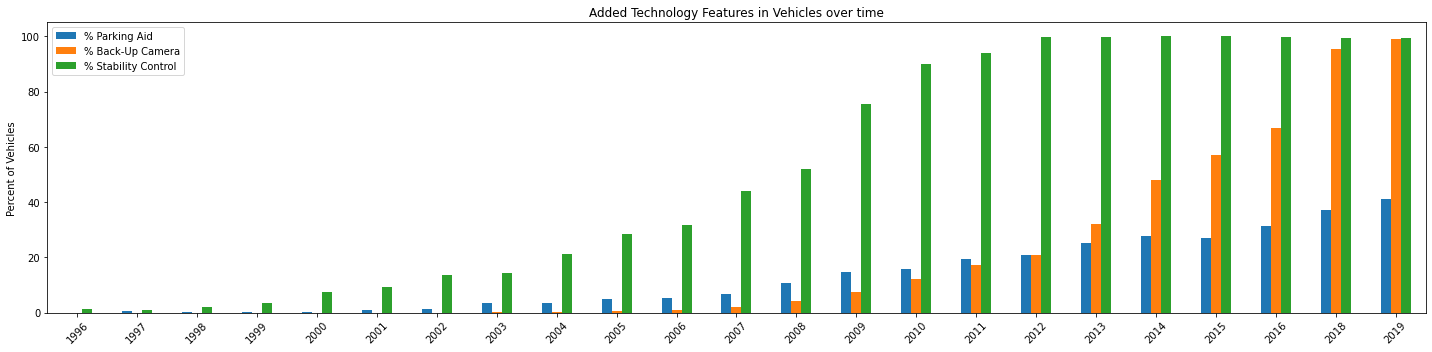

In [51]:
#Create a multiplot bar chart showing 3 technology features over time 
technology_multibar= final_tech_df[["% Parking Aid", "% Back-Up Camera", "% Stability Control"]].plot(kind="bar", figsize=(20,5))

#Create titles, aesthetics, labels
technology_multibar.set_xticklabels(final_tech_df["Year"], rotation=45)
plt.title("Added Technology Features in Vehicles over time")
plt.ylabel("Percent of Vehicles")
plt.tight_layout()

#Save as an output PNG file
plt.savefig('output_images/Tech_barchart.png', dpi=150)

plt.show()

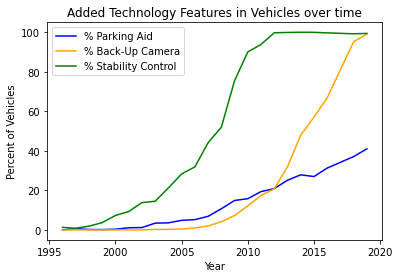

In [52]:
#Create and combine line charts showing 3 technology features over time 
parking_aid, =plt.plot(final_tech_df[["Year"]], final_tech_df["% Parking Aid"], color="blue", label="% Parking Aid")

backup_camera, =plt.plot(final_tech_df["Year"], final_tech_df["% Back-Up Camera"], color="orange", label="% Back-Up Camera")

stability_control, =plt.plot(final_tech_df[["Year"]], final_tech_df["% Stability Control"], color="green", label="% Stability Control")


#Set legends, titles, and labels
plt.legend(handles=[parking_aid, backup_camera, stability_control], loc="upper left")
plt.title("Added Technology Features in Vehicles over time")
plt.ylabel("Percent of Vehicles")
plt.xlabel("Year")

#Save as an output PNG file
plt.savefig('output_images/Tech_linechart.png', dpi=150)

plt.show()

### Please see slides for detailed insight!